# Experiments in Peak Detection


In [68]:
from typing import Optional, Tuple, Dict
import numpy as np
from numpy.typing import NDArray
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt
from img_to_array import img_to_array
import glob

%matplotlib inline
np.set_printoptions(precision=3)


# Let Us Do This

This section demonstrates basic functionality with a simple calculation.


In [69]:
def detect_peaks_scipy(
    y: NDArray[np.floating],
    height: float | None = None,
    distance: int | None = None,
    prominence: float | None = None,
) -> Tuple[NDArray[np.integer], Dict[str, NDArray[np.floating]]]:
    """
    Detect peaks using SciPy's C-optimized algorithm.

    Returns:
        peaks: indices of the peaks
        properties: dict mapping property names to arrays of the same length
    """
    kwargs: dict[str, float | int] = {}
    if height is not None:
        kwargs["height"] = height
    if distance is not None:
        kwargs["distance"] = distance
    if prominence is not None:
        kwargs["prominence"] = prominence

    peaks, properties = find_peaks(y, **kwargs)
    return peaks, properties

Peaks detected in img/breath_3_simple.png: [273]
Properties of peaks in img/breath_3_simple.png: {'peak_heights': array([0.931]), 'prominences': array([0.857]), 'left_bases': array([13]), 'right_bases': array([935])}
Peak 0: left=936, right=935, peak=273


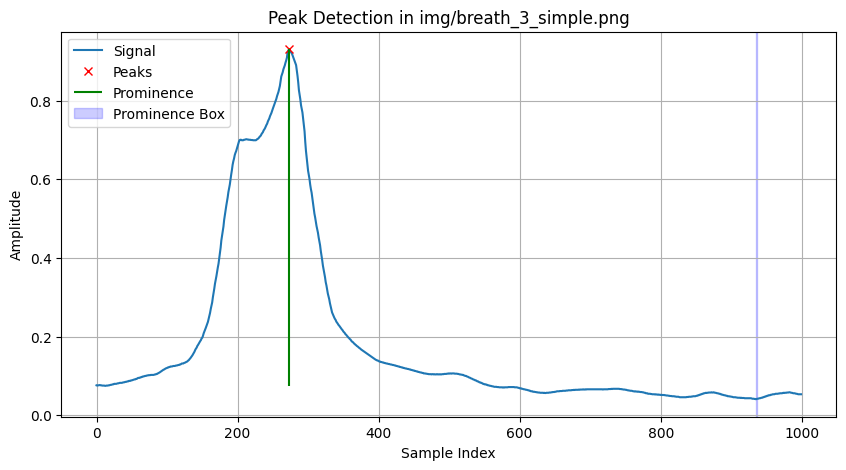

Peaks detected in img/flat.png: []
Properties of peaks in img/flat.png: {'peak_heights': array([], dtype=float64), 'prominences': array([], dtype=float64), 'left_bases': array([], dtype=int64), 'right_bases': array([], dtype=int64)}


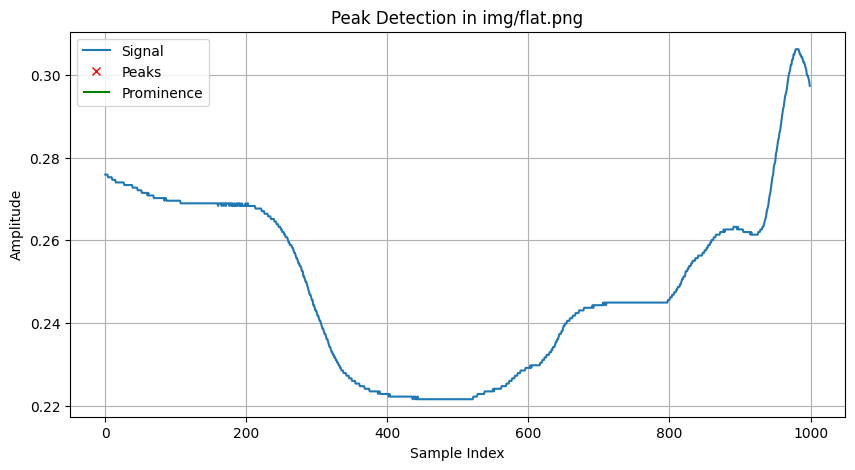

Peaks detected in img/fall.png: []
Properties of peaks in img/fall.png: {'peak_heights': array([], dtype=float64), 'prominences': array([], dtype=float64), 'left_bases': array([], dtype=int64), 'right_bases': array([], dtype=int64)}


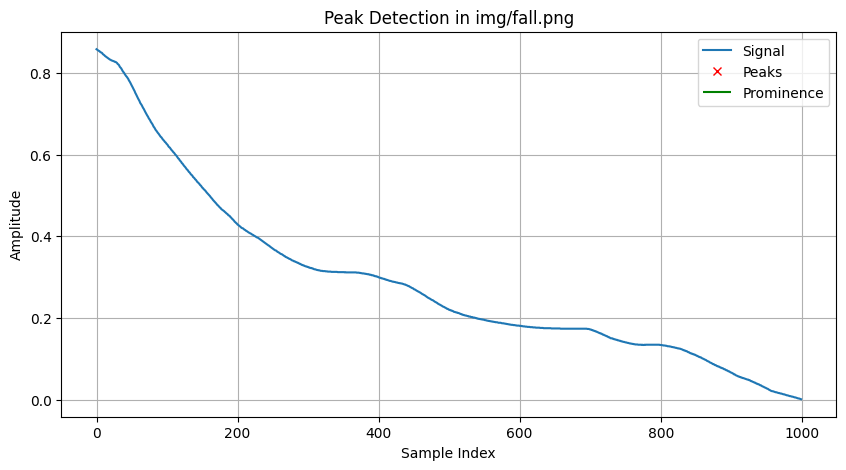

Peaks detected in img/wacky.png: [150 733 963]
Properties of peaks in img/wacky.png: {'peak_heights': array([0.873, 0.943, 0.903]), 'prominences': array([0.542, 0.718, 0.505]), 'left_bases': array([ 98,  98, 905]), 'right_bases': array([307, 905, 999])}
Peak 0: left=1000, right=307, peak=150


IndexError: index 1000 is out of bounds for axis 0 with size 1000

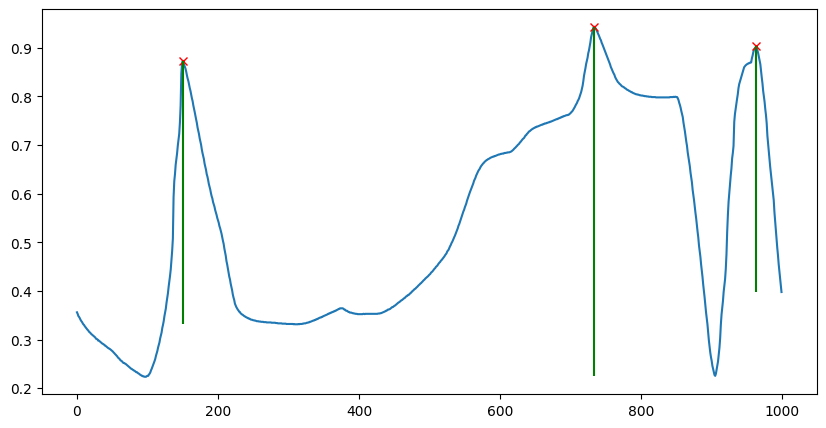

In [ ]:
# files = ["img/breath_2_simple.png", "img/breath_3_simple.png"]
# get all pngs in img/
# directory, you can use glob.glob("img/*.png") if needed

files = glob.glob("img/*.png")
colors = ["blue", "orange", "green", "red", "purple", "yellow"]

for file in files:
    y_vals = img_to_array(file)

    peaks, properties = detect_peaks_scipy(
        y_vals, height=0.5, distance=10, prominence=0.1
    )
    print(f"Peaks detected in {file}: {peaks}")
    print(f"Properties of peaks in {file}: {properties}")

    # Plot the data, peaks, and prominences
    plt.figure(figsize=(10, 5))
    plt.plot(y_vals, label="Signal")
    plt.plot(peaks, y_vals[peaks], "x", label="Peaks", color="red")
    plt.vlines(
        peaks,
        y_vals[peaks] - properties["prominences"],
        y_vals[peaks],
        color="green",
        label="Prominence",
    )

    # Add transparent boxes for prominences
    if "left_bases" in properties and "right_bases" in properties:
        # for left, right, peak in zip(
        #     properties["left_bases"], properties["right_bases"], peaks
        # ):
        #     ymin = min(y_vals[left], y_vals[right], y_vals[peak])
        #     ymax = max(y_vals[left], y_vals[right], y_vals[peak])
        #     plt.axvspan(
        #         left,
        #         right,
        #         ymin=0,
        #         ymax=1,
        #         color="orange",
        #         alpha=0.2,
        #         label="Prominence Box" if peak == peaks[0] else None,
        #     )
        for i in range(len(peaks)):
            left = properties["left_bases"][i]
            right = properties["right_bases"][i]
            if left < properties["right_bases"][i - 1]:
                left = min(properties["right_bases"][i - 1] + 1, len(y_vals) - 1)
            print(f"Peak {i}: left={left}, right={right}, peak={peaks[i]}")
            peak = peaks[i]
            ymin = min(y_vals[left], y_vals[right], y_vals[peak])
            ymax = max(y_vals[left], y_vals[right], y_vals[peak])
            plt.axvspan(
                left,
                right,
                ymin=0,
                ymax=1,
                color=colors[i % len(colors)],
                alpha=0.2,
                label="Prominence Box" if i == 0 else None,
            )

    plt.title(f"Peak Detection in {file}")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid()
    plt.show()
    plt.close()